In [1]:
"""
In order to run the code as is, you will need scipy, pandas and tqdm installed 
(although tqdm is only needed for the progress bar, and pandas is only for the autocorrelation function)
All of these can be installed (on linux) from the command interface using 'pip'
""" 

import scipy.io as sio
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from gibbsrank import gibbs_sample
from eprank import eprank
import pandas
from cw2 import sorted_barplot

We first need to load the data, stored in "tennis_data.mat". The data consists of an array, $W$ containing the names of each player, and an array, G, containing the results of all of the matches in the season. 

In [2]:
# set seed for reproducibility
np.random.seed(0)
# load data
data = sio.loadmat('tennis_data.mat')
# Array containing the names of each player
W = data['W']
# loop over array to format more nicely
for i, player in enumerate(W):
    W[i] = player[0]
# Array of size num_games x 2. The first entry in each row is the winner of game i, the second is the loser
G = data['G'] - 1
# Number of players
M = W.shape[0]
# Number of Games
N = G.shape[0]

# Gibbs sampling (This may take a minute)

In [84]:
# number of iterations
num_iters = 1100
# perform gibbs sampling, skill samples is an num_players x num_samples array
skill_samples = gibbs_sample(G, M, num_iters)#, random_nums)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1100/1100 [00:34<00:00, 31.68it/s]


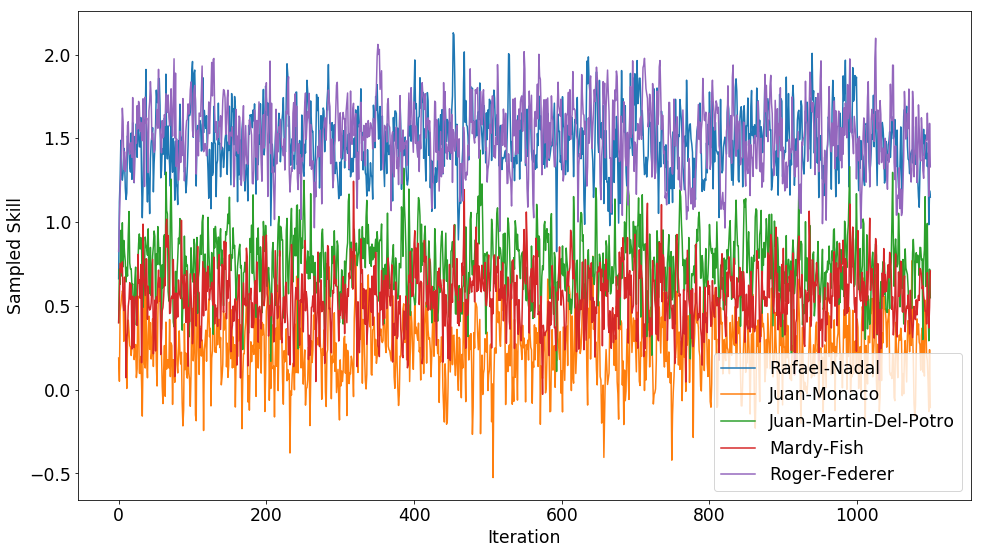

In [118]:
plt.figure(figsize=(16,9))
for i in range(5):
    plt.plot(skill_samples[i,:], label = W[i][0] )
plt.xlabel('Iteration')
plt.ylabel('Sampled Skill')
plt.legend()
plt.rc('axes', titlesize='xx-large')     # fontsize of the axes title
plt.rc('axes', labelsize='xx-large')    # fontsize of the x and y labels
plt.rc('xtick', labelsize='xx-large')    # fontsize of the tick labels
plt.rc('ytick', labelsize='xx-large')    # fontsize of the tick labels
plt.rc('legend', fontsize='xx-large')    # 

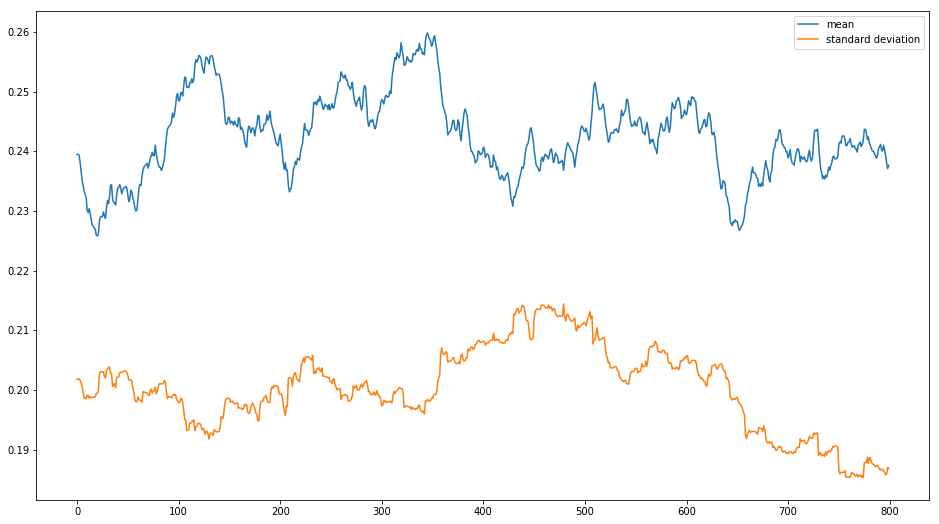

In [109]:
p1=skill_samples[1,:]
num_to_ave=300
m = np.zeros((num_iters-num_to_ave, 1))
sd = np.zeros((num_iters-num_to_ave,1))
for i in range(num_iters-num_to_ave):
    m[i]=np.mean(p1[i:i+num_to_ave])
    sd[i]=np.std(p1[i:i+num_to_ave])
plt.figure(figsize=(16,9))
plt.plot(m, label = 'mean')
plt.plot(sd,label='standard deviation')
plt.legend()


C:\Users\Harvey\Anaconda33\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Harvey\Anaconda33\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


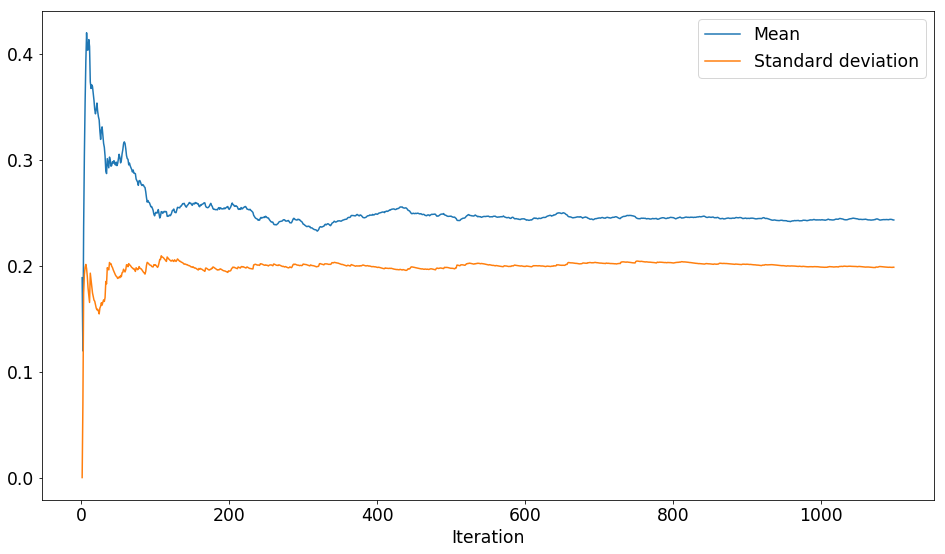

In [117]:
m = np.zeros((num_iters, 1))
sd = np.zeros((num_iters,1))
for i in range(num_iters):
    m[i]=np.mean(p1[0:i])
    sd[i]=np.std(p1[0:i])
plt.figure(figsize=(16,9))
plt.plot(m, label = 'Mean')
plt.plot(sd,label='Standard deviation')
plt.legend()
plt.xlabel('Iteration')
plt.rc('axes', titlesize='xx-large')     # fontsize of the axes title
plt.rc('axes', labelsize='xx-large')    # fontsize of the x and y labels
plt.rc('xtick', labelsize='xx-large')    # fontsize of the tick labels
plt.rc('ytick', labelsize='xx-large')    # fontsize of the tick labels
plt.rc('legend', fontsize='xx-large')    # 

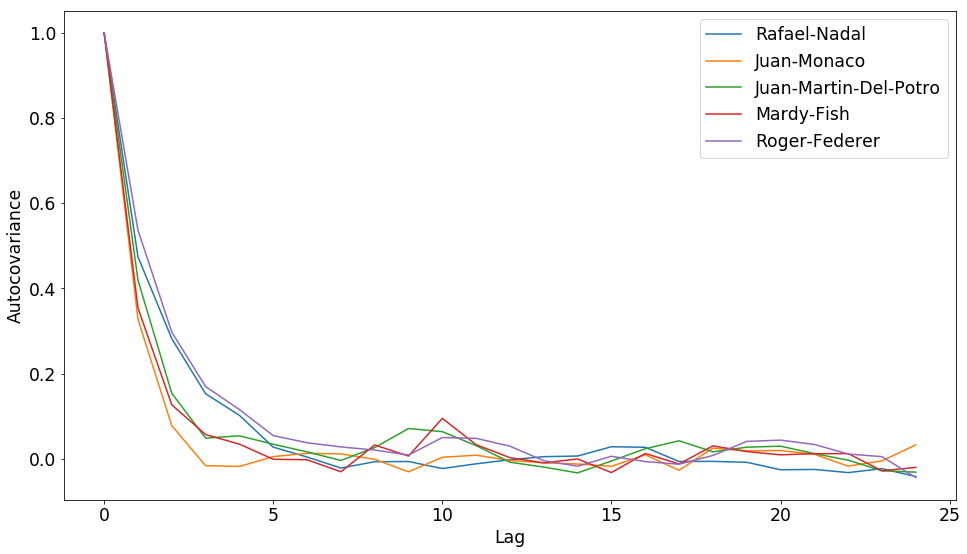

In [119]:
# Code for plotting the autocorrelation function for player p
p = 5
t=25
plt.figure(figsize=(16,9))
plt.xlabel('Lag')
plt.ylabel('Autocovariance')
for p in range(5):
    autocor = np.zeros(t)
    for i in range(t):
        autocor[i]=pandas.Series.autocorr(pandas.Series(skill_samples[p,:]),lag=i)
    plt.plot(autocor, label = W[p][0])
plt.legend()
plt.rc('axes', titlesize='xx-large')     # fontsize of the axes title
plt.rc('axes', labelsize='xx-large')    # fontsize of the x and y labels
plt.rc('xtick', labelsize='xx-large')    # fontsize of the tick labels
plt.rc('ytick', labelsize='xx-large')    # fontsize of the tick labels
plt.rc('legend', fontsize='xx-large')    # 

# EP ranking

In [8]:
num_iters = 3
# run message passing algorithm, returns mean and precision for each player
mean_player_skills, precision_player_skills = eprank(G, M, num_iters)

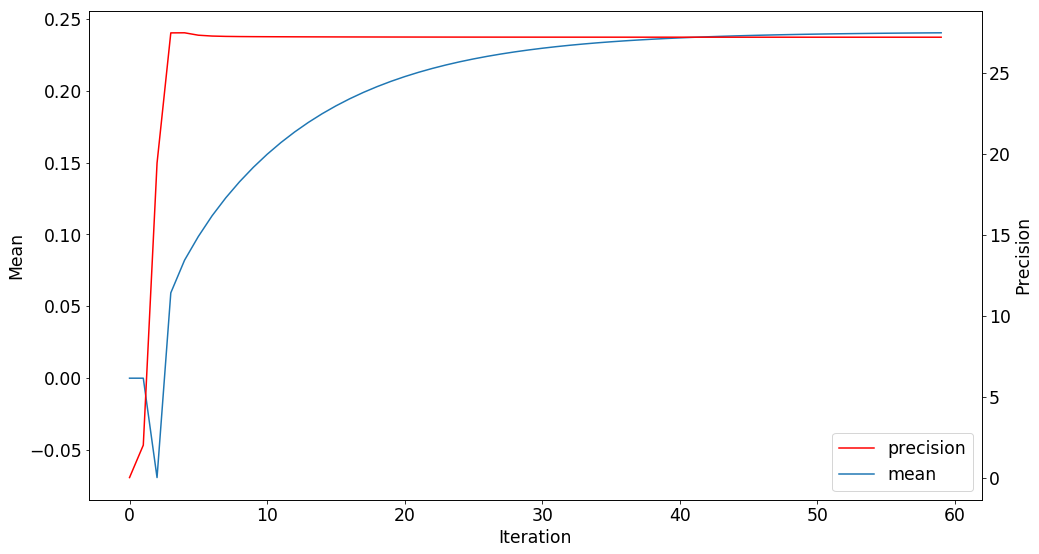

In [121]:
max_i=60
means=np.zeros((W.shape[0],max_i))
precisions=np.zeros((W.shape[0],max_i))
for i in range(max_i):
    means[:,i], precisions[:,i] = eprank(G, M, i)
  
player = 1    
fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(111)
mp=ax1.plot(means[player,:], label = 'mean')
ax1.set_ylabel('Mean')
ax1.set_xlabel('Iteration')

ax2=ax1.twinx()
pp=ax2.plot(precisions[player,:],label='precision',color='r')
ax2.set_ylabel('Precision')
               
lns= pp + mp
labs=[l.get_label() for l in lns]
ax1.legend(lns, labs,loc='lower right')

means_ep = means[:,-1]
precision_ep = precisions[:,-1]
plt.rc('axes', titlesize='xx-large')     # fontsize of the axes title
plt.rc('axes', labelsize='xx-large')    # fontsize of the x and y labels
plt.rc('xtick', labelsize='xx-large')    # fontsize of the tick labels
plt.rc('ytick', labelsize='xx-large')    # fontsize of the tick labels
plt.rc('legend', fontsize='xx-large')    # 

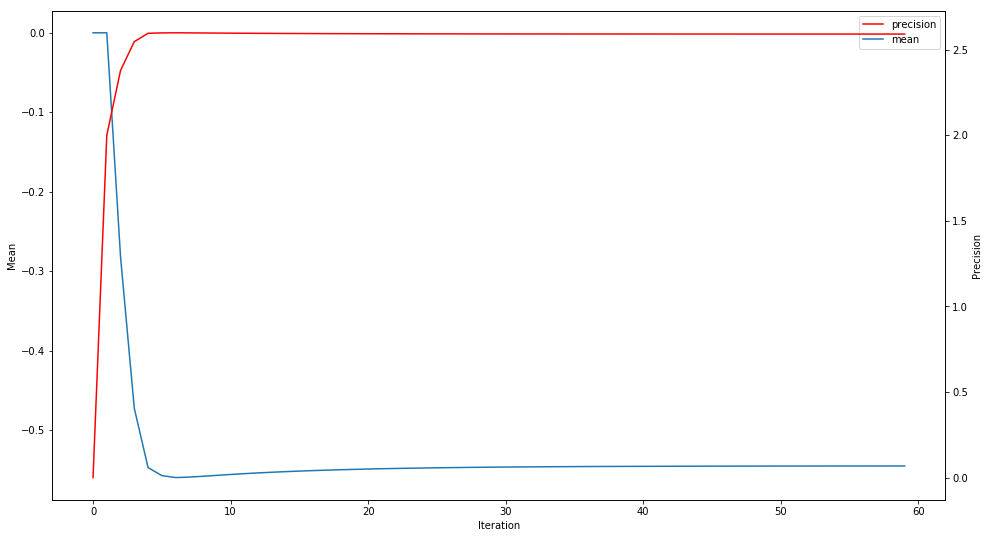

In [105]:
   
fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Mean')
ax1.set_xlabel('Iteration')
ax2=ax1.twinx()
ax2.set_ylabel('Precision')
player=106
mp=ax1.plot(means[player,:], label = 'mean')

pp=ax2.plot(precisions[player,:],label='precision',color='r')

               
lns= pp + mp
labs=[l.get_label() for l in lns]
ax1.legend(lns, labs)

In [10]:
#Top four players
# Novak-Djokovic
#Rafael-Nadal
#Roger-Federer
#Andy-Murray

ids = np.ones(4)

for i in range(W.size):
    name = W[i][0]
    if name == 'Novak-Djokovic':
        ids[0]=int(i)
    elif name == 'Rafael-Nadal':
        ids[1]=int(i)
    elif name == 'Roger-Federer':
        ids[2]=int(i)
    elif name == 'Andy-Murray':
        ids[3]=int(i)
print(ids)

[15.  0.  4. 10.]


In [11]:
def prob_skill_higher(p1,p2,means,pres,performance=0):
    #probability that s1>s2 = p(s1-s2>0) let z=s1-s2 , z~(m1-m2,v1+v2)
    p1=int(p1)
    p2=int(p2)
    mean = means[p1,-1]-means[p2,-1]
    var = 1/pres[p1,-1] + 1/pres[p2,-1] + performance
    prob = 1 - norm.cdf((0-mean)/(var**0.5))
    return prob
  

In [12]:
test = prob_skill_higher(ids[0],ids[1],means, precisions)


t1 = np.zeros((4,4))
for col in range(4):
    for row in range(4):
        t1[row,col] = prob_skill_higher(ids[col],ids[row],means, precisions) ## prob that col beats row
print(t1)



[[0.5        0.06017372 0.09111324 0.01467898]
 [0.93982628 0.5        0.57283993 0.23349593]
 [0.90888676 0.42716007 0.5        0.18917038]
 [0.98532102 0.76650407 0.81082962 0.5       ]]


In [13]:
t1 = np.zeros((4,4))
for col in range(4):
    for row in range(4):
        t1[row,col] = prob_skill_higher(ids[col],ids[row],means, precisions,1) ## prob that col beats row
print(t1)

[[0.5        0.34463064 0.36197297 0.28017657]
 [0.65536936 0.5        0.51835434 0.4268952 ]
 [0.63802703 0.48164566 0.5        0.40912366]
 [0.71982343 0.5731048  0.59087634 0.5       ]]


[1.90500978 1.46619885]
[0.22041676 0.1849853 ]
P(s1>s2)= 0.9363635601199722
P(t1>t2)= 0.6633776729267233


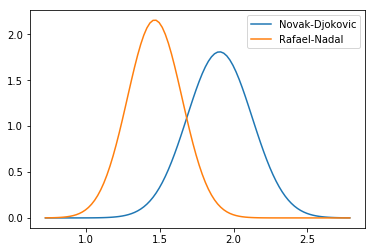

In [14]:
burn_in=200
means = np.zeros(2)
sds = np.zeros(2)
for i in range(2):
    means[i]=np.mean(skill_samples[int(ids[i]),:][burn_in:-1])
    sds[i]=np.std(skill_samples[int(ids[i]),:][burn_in:-1])
print(means)
print(sds)

mean = means[0]-means[1]
var = sds[0]**2 + sds[1]**2
skillprob = 1 - norm.cdf((0-mean)/(var**0.5))
print('P(s1>s2)=', skillprob)

var+=1
perprob = 1 - norm.cdf((0-mean)/(var**0.5))
print('P(t1>t2)=', perprob)



x=np.linspace(means[1]-4*sds[1],means[0]+4*sds[0],100)
y1=norm.pdf(x,means[0],sds[0])
y2=norm.pdf(x,means[1],sds[1])
plt.plot(x,y1, label=W[int(ids[0])][0])
plt.plot(x,y2, label=W[int(ids[1])][0])
plt.legend()

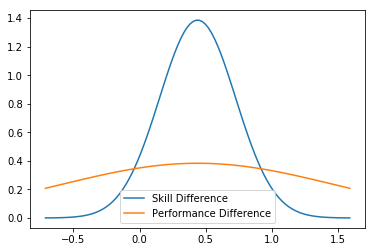

In [15]:
mean = means[0]-means[1]
var = sds[0]**2 + sds[1]**2

x=np.linspace(mean-4*var**0.5,mean+4*var**0.5,100)
y1=norm.pdf(x,mean,var**0.5)
y2=norm.pdf(x,mean,(var+1)**0.5)
plt.plot(x,y1, label='Skill Difference')
plt.plot(x,y2, label='Performance Difference')
plt.legend()

In [123]:
burn_in=200
data = np.zeros((2,skill_samples.shape[1]-burn_in-1))
means= np.zeros(2)
for i in range(2):
    data[i,:] = skill_samples[int(ids[i]),:][burn_in:-1]
    means[i]=np.mean(data[i,:])
 

cov = np.cov(data)
print(cov)
print(means)




[[0.04264372 0.00911252]
 [0.00911252 0.0373226 ]]
[1.8647651  1.49274828]


In [17]:
it= 100000
count=0


for i in range(it):
    sample = np.random.multivariate_normal(means,cov)
    if sample[0]>sample[1]:
        count+=1
prob = count/it
print('P(s1>s2)=', prob)

P(s1>s2)= 0.95944


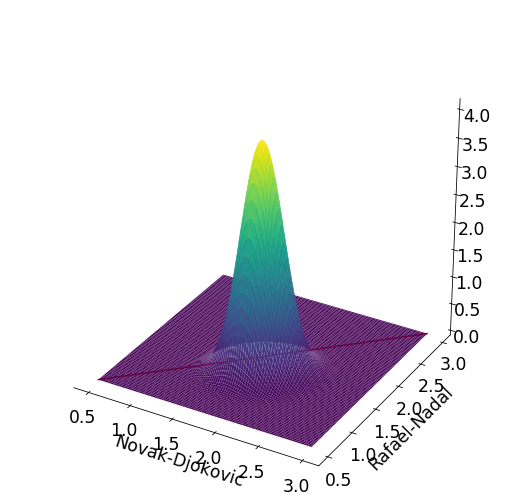

In [125]:
from scipy.stats import multivariate_normal
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

F = multivariate_normal(means,cov)


N = 300
X = np.linspace(0.5, 3, N)
Y = np.linspace(0.5, 3, N)
X, Y = np.meshgrid(X, Y)


# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y


Z = F.pdf(pos)
#plt.plot(Z)
fig = plt.figure(figsize=(9,9))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
#cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)
plt.plot(np.linspace(0.5,3,2),np.linspace(0.5,3,2),color='r')
 #Adjust the limits, ticks and view angle
#ax.set_zlim(-0.15,0.2)
#ax.set_zticks(np.linspace(0,0.2,5))
#ax.view_init(0, 0)
plt.xlabel(W[int(ids[0])][0])
plt.ylabel(W[int(ids[1])][0])
plt.show()
plt.rc('axes', titlesize='xx-large')     # fontsize of the axes title
plt.rc('axes', labelsize='xx-large')    # fontsize of the x and y labels
plt.rc('xtick', labelsize='large')    # fontsize of the tick labels
plt.rc('ytick', labelsize='xx-large')    # fontsize of the tick labels
plt.rc('legend', fontsize='xx-large')    # 

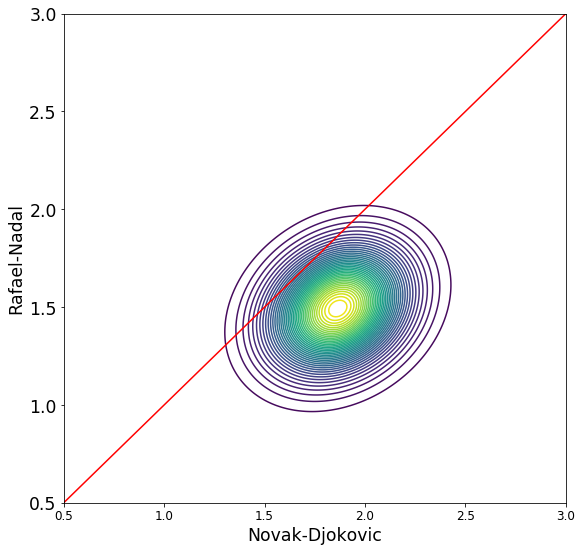

In [126]:
fig = plt.figure(figsize=(9,9))
#ax = fig.gca()


plt.contour(X, Y, Z, cmap=cm.viridis,levels=50)
plt.plot(np.linspace(0.5,3,2),np.linspace(0.5,3,2),color='r')
plt.xlabel(W[int(ids[0])][0])
plt.ylabel(W[int(ids[1])][0])
plt.show()
plt.rc('axes', titlesize='xx-large')     # fontsize of the axes title
plt.rc('axes', labelsize='xx-large')    # fontsize of the x and y labels
plt.rc('xtick', labelsize='xx-large')    # fontsize of the tick labels
plt.rc('ytick', labelsize='xx-large')    # fontsize of the tick labels
plt.rc('legend', fontsize='xx-large')    # 

In [50]:
autocov =5
count=0
burn_in=200
it= int((skill_samples.shape[1]-burn_in-1)//autocov )


for i in range(it):
    x1 = skill_samples[int(ids[0]),burn_in + autocov*i ]
    x2 = skill_samples[int(ids[1]),burn_in + autocov*i ]
    if x1>x2:
        count+=1
prob = count/it
print(it)
print('P(s1>s2)=', prob)



179
P(s1>s2)= 0.9720670391061452


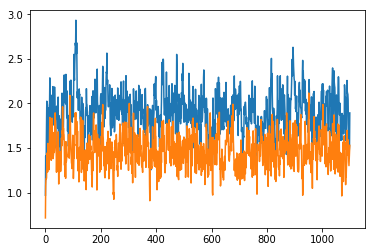

In [36]:
plt.plot(skill_samples[int(ids[0]),:], label = W[int(ids[0])] )
plt.plot(skill_samples[int(ids[1]),:], label = W[int(ids[1])] )

In [55]:
burn_in=200
data = np.zeros((4,skill_samples.shape[1]-burn_in-1))
means= np.zeros(4)
for i in range(4):
    data[i,:] = skill_samples[int(ids[i]),:][burn_in:-1]
    means[i]=np.mean(data[i,:])
s1 = np.zeros((4,4)) 
it= 100000
combi = 6
p = [0,1,0,2,0,3,1,2,1,3,2,3]
d = np.zeros((2,skill_samples.shape[1]-burn_in-1))
m=np.zeros(2)
for j in range(combi):
    player1 = p[j*2]
    player2=p[j*2+1]
    d[0,:]=data[player1,:]
    d[1,:]=data[player2,:]
    m[0]=means[player1]
    m[1]=means[player2]
    cov = np.cov(d)
    print(player1, player2)
    print(cov)
    print(m)

    count=0
    for i in range(it):
        sample = np.random.multivariate_normal(m,cov)
        if sample[0]>sample[1]:
            count+=1
    prob = count/it
    s1[player2,player1] = prob
    s1[player1,player2] = 1- prob
print(s1)

0 1
[[0.04863765 0.00959909]
 [0.00959909 0.03425767]]
[1.90500978 1.46619885]
0 2
[[0.04863765 0.00777915]
 [0.00777915 0.03745351]]
[1.90500978 1.51591814]
0 3
[[0.04863765 0.01107567]
 [0.01107567 0.03872244]]
[1.90500978 1.27096337]
1 2
[[0.03425767 0.00605408]
 [0.00605408 0.03745351]]
[1.46619885 1.51591814]
1 3
[[0.03425767 0.00898938]
 [0.00898938 0.03872244]]
[1.46619885 1.27096337]
2 3
[[0.03745351 0.00557511]
 [0.00557511 0.03872244]]
[1.51591814 1.27096337]
[[0.      0.03994 0.07223 0.00638]
 [0.96006 0.      0.57884 0.20402]
 [0.92777 0.42116 0.      0.16801]
 [0.99362 0.79598 0.83199 0.     ]]


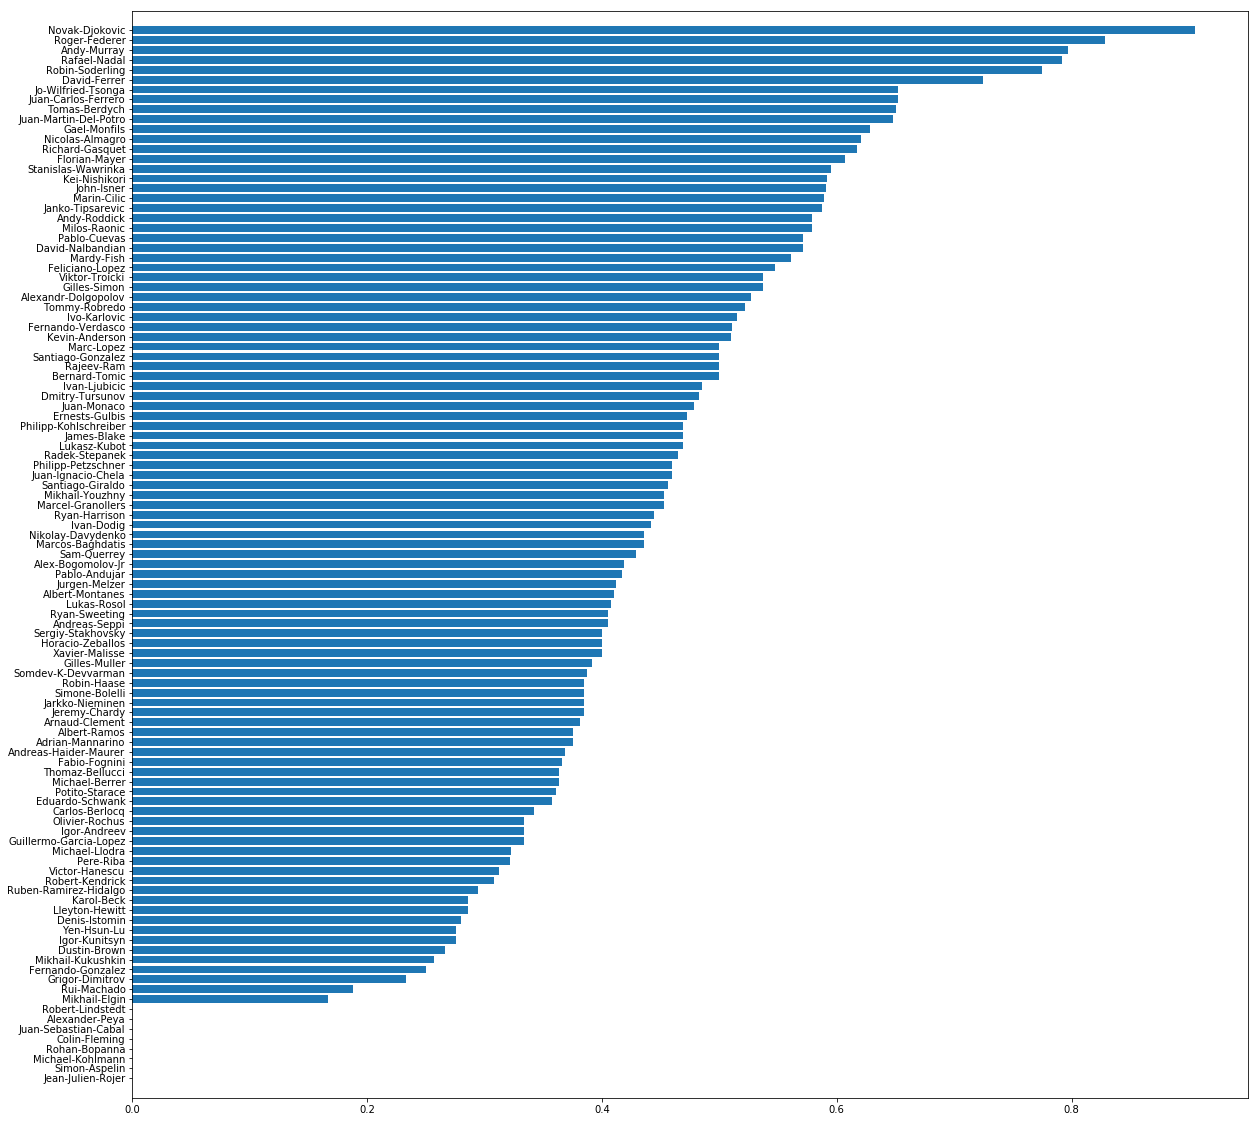

In [70]:
#empirical game outcomes


probs = np.zeros(M)
wl = np.zeros((M,2))
for g in range(G.shape[0]):
   wl[G[g,0],0]+=1
   wl[G[g,1],1]+=1
probs = wl[:,0]/(wl[:,0]+wl[:,1])    

sorted_barplot(probs,W)

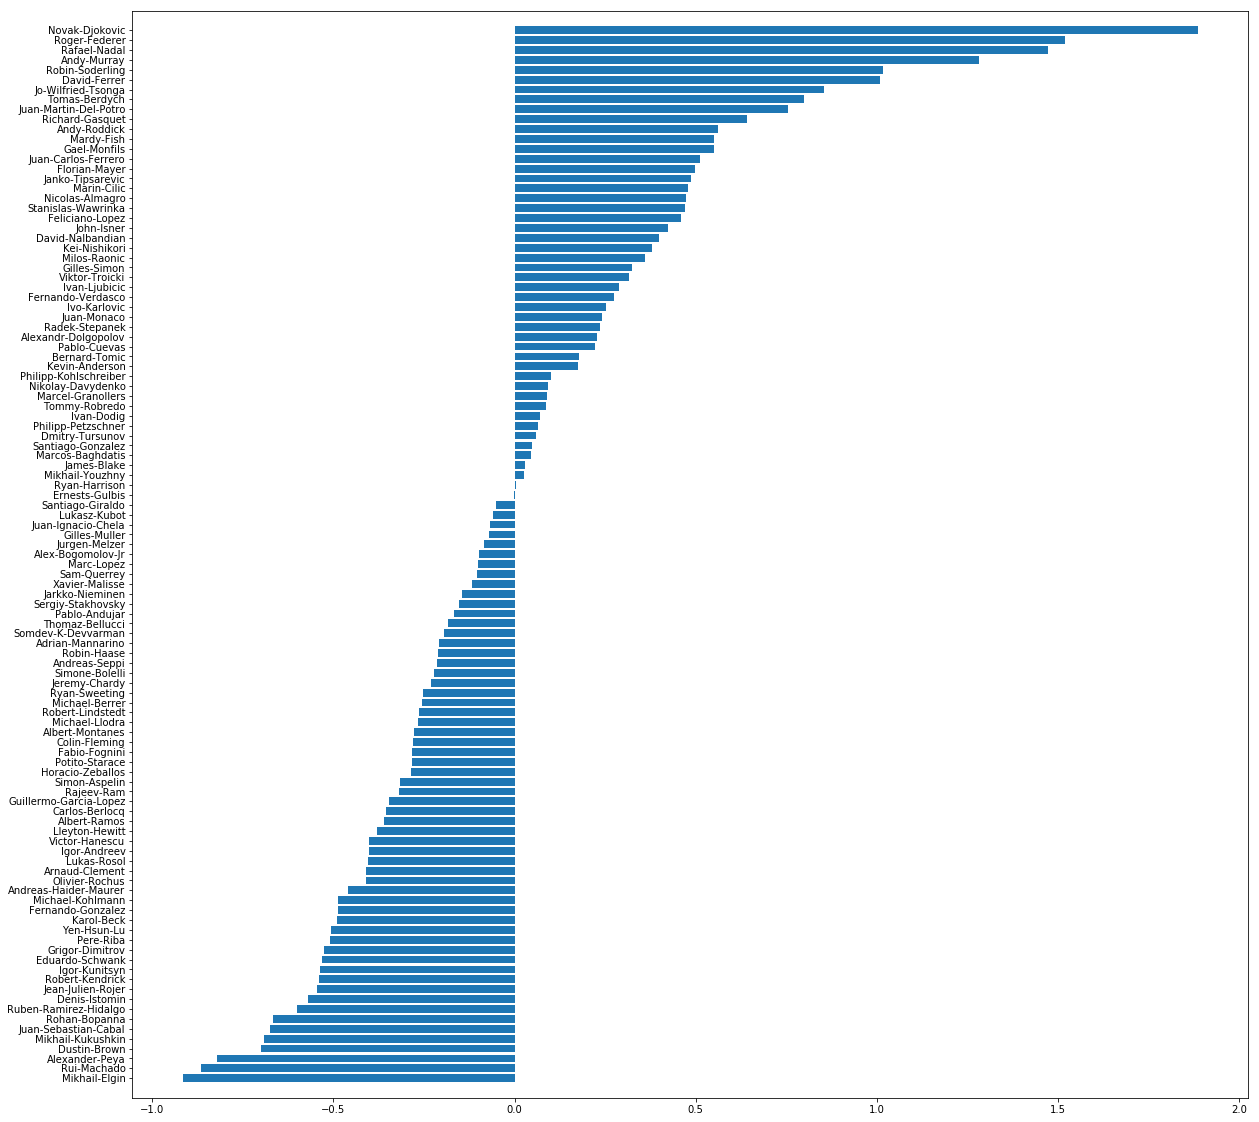

In [72]:
sorted_barplot(means_ep,W)

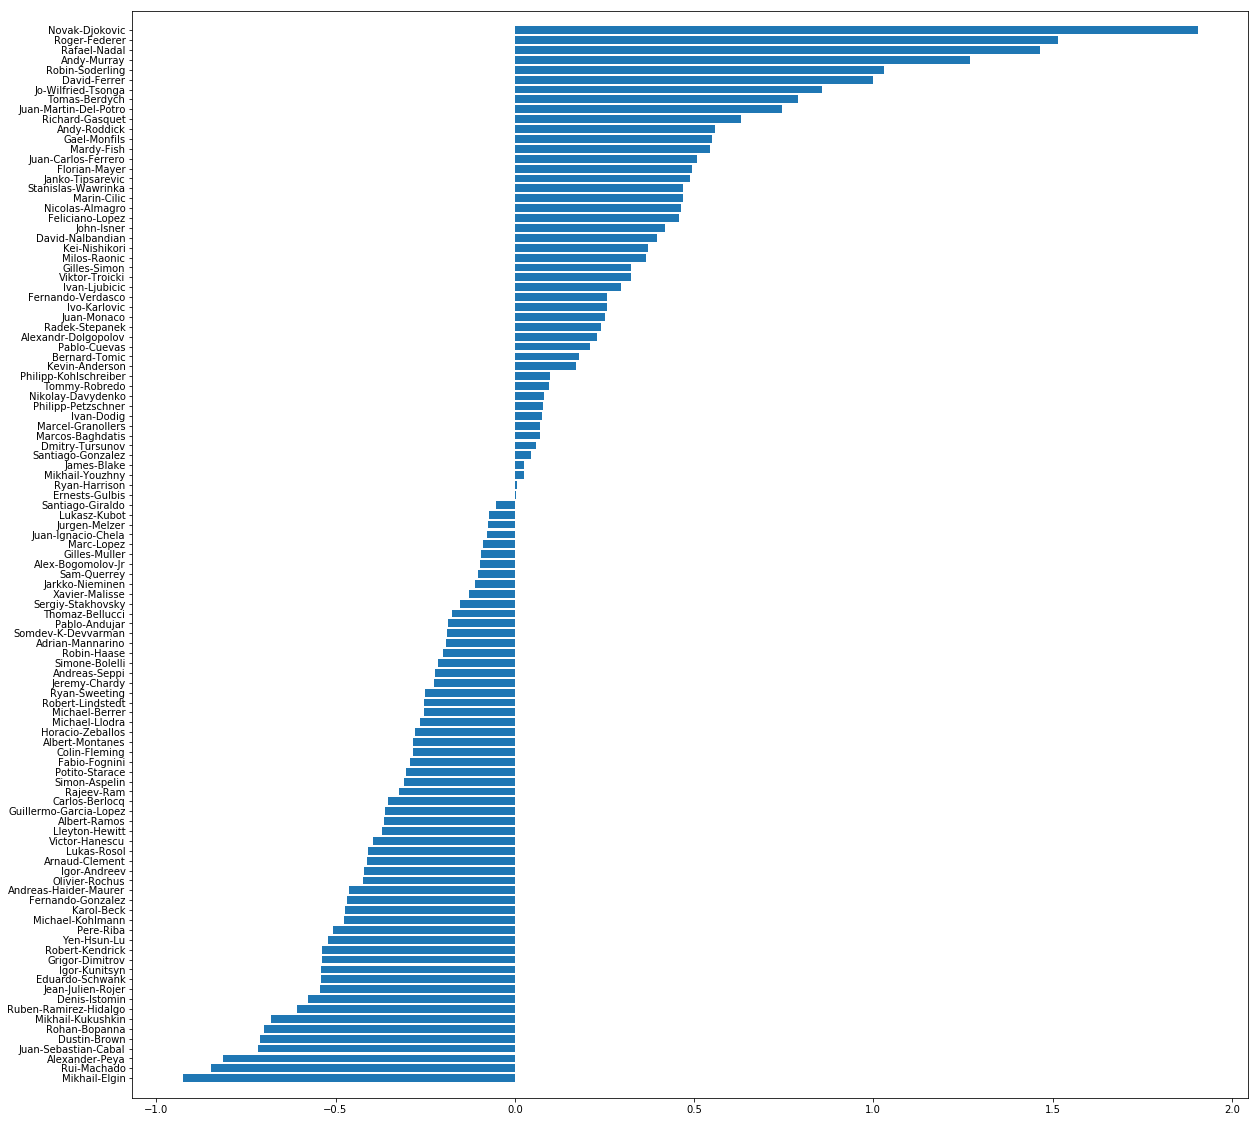

In [80]:
burn_in=200

means_gibbs = np.mean (skill_samples[:,burn_in:-1],axis=1)
sorted_barplot(means_gibbs,W)